In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


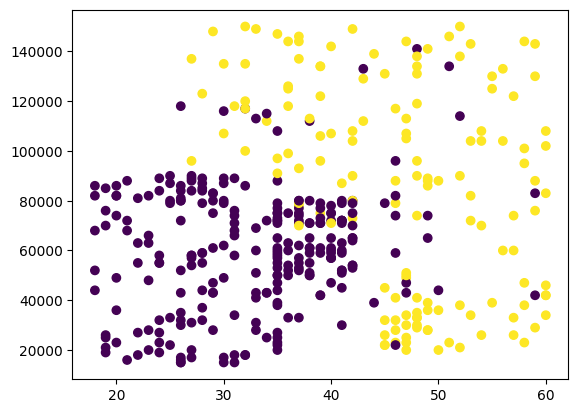

In [7]:
plt.scatter(x = df['Age'],y = df['EstimatedSalary'],c=df['Purchased'])

In [8]:
df = df.drop(columns = ['User ID','Gender'])

In [9]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Set parameters to 0
model.get_weights()

[array([[-0.4132033 , -0.02417326, -0.4082251 ,  0.21137756,  0.26107377,
          0.6360571 , -0.57835454, -0.35294798, -0.24606964,  0.15004498],
        [ 0.05229008, -0.67070013,  0.10139132,  0.07877648, -0.09084398,
         -0.61691606,  0.6449378 ,  0.298657  ,  0.15864009, -0.02208495]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.25155488],
        [-0.06934375],
        [-0.520725  ],
        [ 0.21405977],
        [ 0.01311719],
        [-0.33946893],
        [ 0.06463611],
        [ 0.64864284],
        [ 0.388956  ],
        [-0.72195566]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
initial_weights = model.get_weights()

In [14]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [15]:
model.set_weights(initial_weights)

In [16]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6795 - loss: 0.6878 - val_accuracy: 0.3625 - val_loss: 0.7090
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7261 - loss: 0.6664 - val_accuracy: 0.3625 - val_loss: 0.7271
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7328 - loss: 0.6463 - val_accuracy: 0.3625 - val_loss: 0.7469
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6880 - loss: 0.6445 - val_accuracy: 0.3625 - val_loss: 0.7656
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7041 - loss: 0.6300 - val_accuracy: 0.3625 - val_loss: 0.7858
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7093 - loss: 0.6202 - val_accuracy: 0.3625 - val_loss: 0.8047
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7233 - loss: 0.6066 - val_accuracy: 0.3625 - val_loss: 0.8236
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6998 - loss: 0.6162 - val_accuracy: 0.3625 - 

In [19]:
model.get_weights()

[array([[0.00554891, 0.00554891, 0.00554891, 0.00554891, 0.00554891,
         0.00554891, 0.00554891, 0.00554891, 0.00554891, 0.00554891],
        [0.00555885, 0.00555885, 0.00555885, 0.00555885, 0.00555885,
         0.00555885, 0.00555885, 0.00555885, 0.00555885, 0.00555885]],
       dtype=float32),
 array([0.00528845, 0.00528845, 0.00528845, 0.00528845, 0.00528845,
        0.00528845, 0.00528845, 0.00528845, 0.00528845, 0.00528845],
       dtype=float32),
 array([[-0.08274323],
        [-0.08274323],
        [-0.08274323],
        [-0.08274323],
        [-0.08274323],
        [-0.08274323],
        [-0.08274323],
        [-0.08274323],
        [-0.08274323],
        [-0.08274323]], dtype=float32),
 array([-0.08158834], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

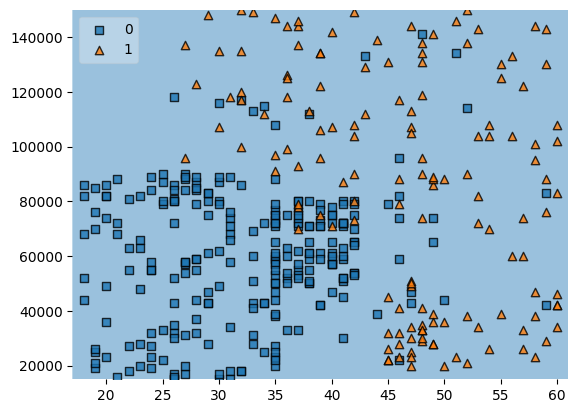

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)